In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mne import time_frequency, create_info, EpochsArray

In [2]:
channels_path = r'data\channel_names_t150327002.npy'
lfps_path = r'data\LFP_t150327002_GoAlignment.npy'

In [3]:
channels = np.load(channels_path)
lfps = np.load(lfps_path) # shape = trials x ch x time

In [5]:
#psd_multitaper_1, freqs_multitaper_1 = time_frequency.psd_array_multitaper(lfps,fmax=100,sfreq=1000,output='power')
psd_welch_1, freqs_welch_1 = time_frequency.psd_array_welch(lfps,fmax=80,sfreq=1000,n_per_seg=200)


Effective window size : 0.256 (s)


In [6]:
print(psd_welch_1.shape)
print(freqs_welch_1.shape)

(106, 48, 21)
(21,)


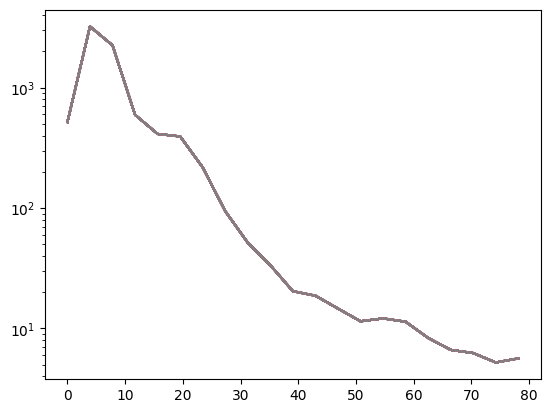

In [7]:
_,ax = plt.subplots()# nrows=psd_multitaper.shape[1], ncols=1,figsize=(6,15))
for i in range(psd_welch_1.mean(axis=(0)).shape[0]):
    plt.semilogy(freqs_welch_1,psd_welch_1.mean(axis=(0))[0])

plt.show()

In [8]:
plt.close('all')

In [9]:
from fooof import FOOOF
from fooof.plts.spectra import plot_spectrum

In [10]:
# Initialize FOOOF object
fm = FOOOF()
# Define frequency range across which to model the spectrum
freq_range = [0, 80]


FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 3.91 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 79 Hz                        
                                 Frequency Resolution is 3.91 Hz                                  
                                                                         

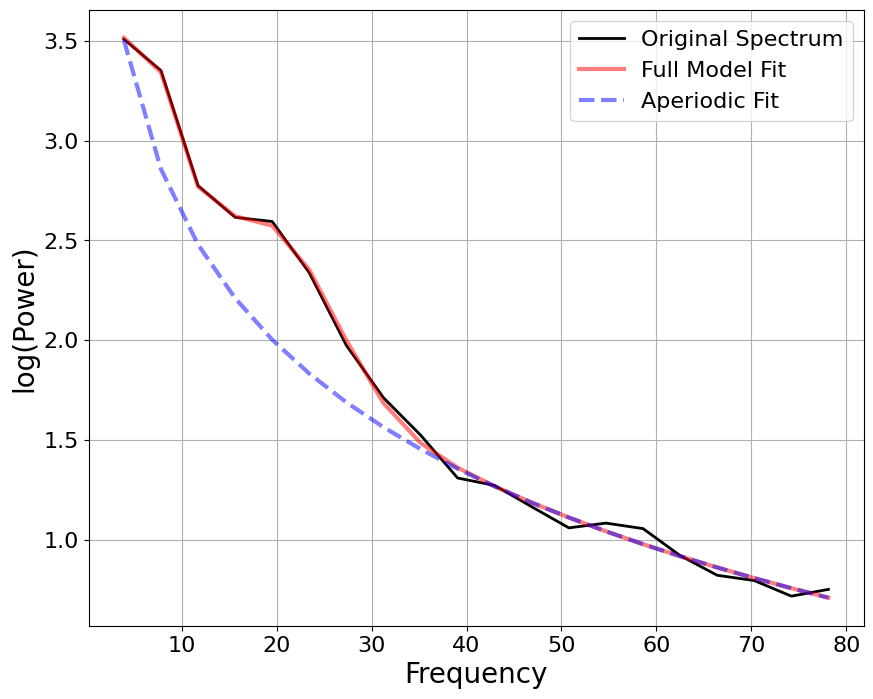

In [11]:
# Report: fit the model, print the resulting parameters, and plot the reconstruction
channel=0
fm.report(freqs_welch_1, psd_welch_1.mean(axis=(0))[channel])

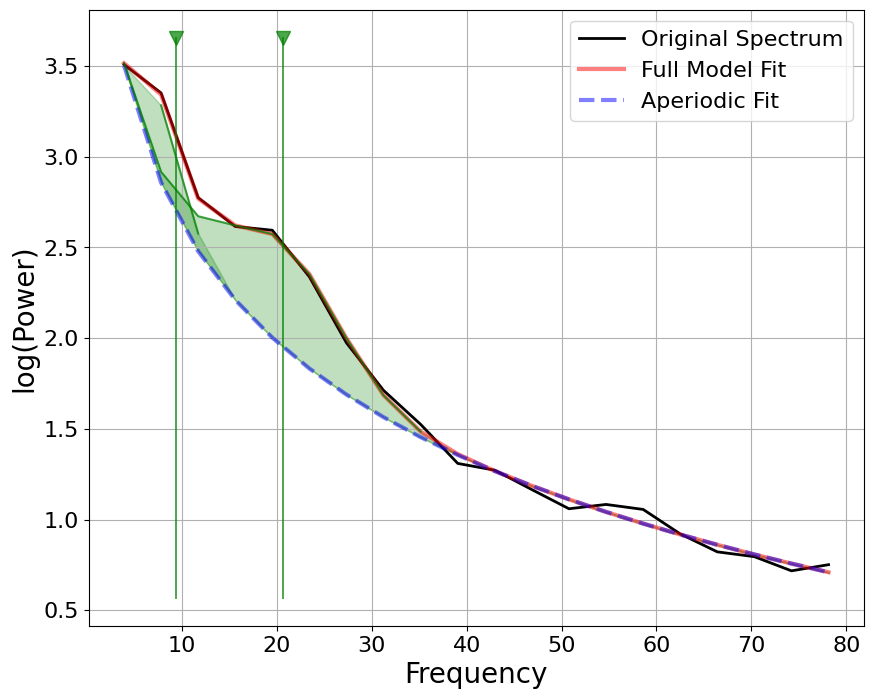

In [12]:
# Combine peak representations
fm.plot(plot_aperiodic=True, plot_peaks='line-shade-outline', plt_log=False)

In [13]:
ch_param_pmd = []
ch_param_m1 = []
for ch in range(24):
    fm.fit(freqs_welch_1, psd_welch_1.mean(axis=(0))[ch],)
    ch_param_pmd.append(fm.peak_params_[:,0])

    fm.fit(freqs_welch_1, psd_welch_1.mean(axis=(0))[ch+24])
    ch_param_m1.append(fm.peak_params_[:,0])




FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 3.91 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 3.91 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.

FOOOF WARNING: Lower-bound peak width limit is < or ~= 

## Not used --------------

In [ ]:
info = create_info(ch_names=channels.tolist(), sfreq=1000,ch_types='seeg')
n_times = lfps.shape[2]  # Just over 1 second epochs
n_epochs = lfps.shape[0]
# Add a 50 Hz sinusoidal burst to the noise and ramp it.
t = np.arange(n_times)

events = np.empty((n_epochs, 3), dtype=int)
first_event_sample = 0
event_id = dict(sin50hz=1)
for k in range(n_epochs):
    events[k, :] = first_event_sample + k * n_times, 0, 1

epochs = EpochsArray(data=lfps, info=info, events=events, event_id=event_id)

epochs.average().plot()

psd_multitaper_2, freqs_multitaper_2 = epochs.compute_psd(method='multitaper',fmax=80, output='power').get_data(return_freqs=True)

In [ ]:
psd_multitaper_2,freqs_multitaper_2= epochs.compute_psd(method="multitaper",fmax=80).get_data(return_freqs=True)

In [ ]:
epochs.plot_psd(fmax=80,method='multitaper',average=True,dB=False)

In [ ]:
psd_multitaper_2.plot_psd(average=True)

In [ ]:
psd_multitaper.get_data()[:,0].shape

In [ ]:
psd_multitaper_1[0,0]

In [ ]:
psd_multitaper_2.get_data().mean(axis=0)[0]-psd_multitaper_2.get_data().mean(axis=0)[0]